## Note that plotly's interactive graphics are not visible on github, only a chart's preview is being shown

In [1]:
#!pip install -U kaleido

In [2]:
#%%writefile imports.py
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go 
import os
from IPython.display import Image

../data/BankNote_Authentication.csv
../data/.gitignore
../data/netflix_titles.csv
../data/CC GENERAL.csv
../data/houseprice/data_description.txt
../data/houseprice/sample_submission.csv
../data/houseprice/train.csv
../data/houseprice/test.csv
../data/digits/submission.csv
../data/digits/sample_submission.csv
../data/digits/train.csv
../data/digits/test.csv


In [3]:
netflix = pd.read_csv('../data/netflix_titles.csv')

In [4]:
netflix.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

## Okay, the first thing that we need to deal is date_added and duration!

In [5]:
#first look at date_added
netflix['date_added'].value_counts()

January 1, 2020      122
November 1, 2019      94
March 1, 2018         78
December 31, 2019     74
October 1, 2018       72
                    ... 
 June 20, 2017         1
January 31, 2018       1
July 3, 2019           1
 July 29, 2016         1
March 31, 2013         1
Name: date_added, Length: 1524, dtype: int64

In [6]:
#first look at duration
netflix['duration'].value_counts()

1 Season     1321
2 Seasons     304
3 Seasons     158
90 min        111
91 min        104
             ... 
174 min         1
182 min         1
190 min         1
192 min         1
15 min          1
Name: duration, Length: 201, dtype: int64

# hmm...Okay, we should create new columns to extract the correct datetime and the duration

In [7]:
def find_month(entry):
    ''' Function that extract the month'''
    return " ".join(re.findall("[a-zA-Z]+", str(entry)))

In [8]:
def find_day(entry):
    ''' Function that extract the day'''
    match = re.match(r'.*(\d[0-9]{1},)', str(entry))
    if match is not None:
        return match.group(1).replace(',','')

In [9]:
def find_year(entry):
    ''' Function that extract the year'''
    match = re.match(r'.*([1-3][0-9]{3})', str(entry))
    if match is not None:
        return match.group(1)

In [10]:
# applying functions
netflix['month_added'] = netflix['date_added'].apply(find_month)
netflix['month_added'] = netflix['month_added'].apply(lambda x: str(x).replace('nan','Not available'))
netflix['day_added'] = netflix['date_added'].apply(find_day)
netflix['year_added'] = netflix['date_added'].apply(find_year)

In [11]:
netflix.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description month_added day_added  \
0  Before planning an awesome wedding for his gra...   September      None   
1  Jandino Asporaat riffs on the challenges of ra...   September      None   
2  With the help of three human allies, the Autob...   September      None   
3  When a prison ship crash unleashes hundreds of...   September      None   
4  When nerdy high schooler Dani finally attracts...   September      None   

  year_added  
0       2019  
1       2016  
2       2018  
3       2018  
4       2017

In [12]:
def extract_min(entry):
    match = re.match(r'.*([\d]+ min)', str(entry))
    if match is not None:
        return int(match.group(0).split(' ')[0])

In [13]:
def extract_season(entry):
    match = re.match(r'.*([0-9]{1,2} Season)', str(entry))
    if match is not None:
        return int(match.group(0).split(' ')[0])

In [14]:
netflix['duration_min'] = netflix['duration'].apply(extract_min)
netflix['seasons'] = netflix['duration'].apply(extract_season)

In [15]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       6234 non-null   int64  
 1   type          6234 non-null   object 
 2   title         6234 non-null   object 
 3   director      4265 non-null   object 
 4   cast          5664 non-null   object 
 5   country       5758 non-null   object 
 6   date_added    6223 non-null   object 
 7   release_year  6234 non-null   int64  
 8   rating        6224 non-null   object 
 9   duration      6234 non-null   object 
 10  listed_in     6234 non-null   object 
 11  description   6234 non-null   object 
 12  month_added   6234 non-null   object 
 13  day_added     3349 non-null   object 
 14  year_added    6223 non-null   object 
 15  duration_min  4265 non-null   float64
 16  seasons       1969 non-null   float64
dtypes: float64(2), int64(2), object(13)
memory usage: 828.1+ KB


In [16]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
month_added        0
day_added       2885
year_added        11
duration_min    1969
seasons         4265
dtype: int64

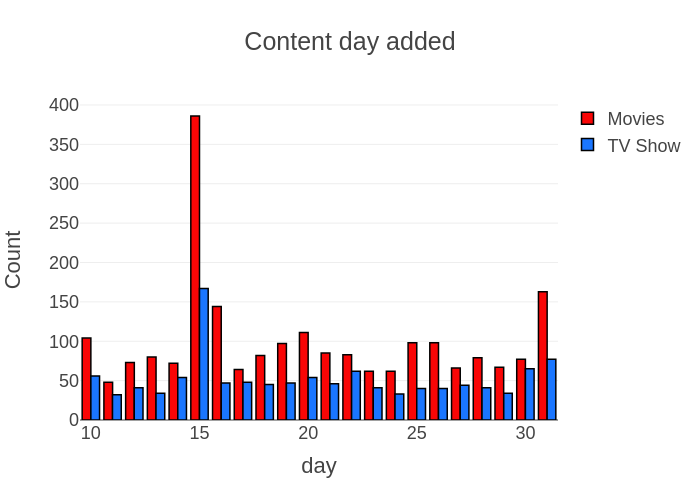

In [17]:
df_aux_movie_day_adeed = pd.DataFrame(netflix.loc[netflix['type']=='Movie'].day_added.value_counts())
df_aux_movie_day_adeed = df_aux_movie_day_adeed.reset_index()
df_aux_movie_day_adeed.columns = ['day','count']
df_aux_movie_day_adeed.sort_values('day',inplace=True)

df_aux_tvshow_day_adeed = pd.DataFrame(netflix.loc[netflix['type']=='TV Show'].day_added.value_counts())
df_aux_tvshow_day_adeed = df_aux_tvshow_day_adeed.reset_index()
df_aux_tvshow_day_adeed.columns = ['day','count']
df_aux_tvshow_day_adeed.sort_values('day',inplace=True)

trace_movie_day_adeed = go.Bar(
                    x=df_aux_movie_day_adeed['day'], 
                    y=df_aux_movie_day_adeed["count"], 
                    name="Movies", 
                    marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

trace_tvshow_day_adeed = go.Bar(
                    x=df_aux_tvshow_day_adeed['day'], 
                    y=df_aux_tvshow_day_adeed["count"], 
                    name="TV Show", 
                    marker= dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(hovermode= 'closest', title = 'Content day added' , xaxis = dict(title = 'day'), yaxis = dict(title = 'Count'),template= "presentation")
fig = go.Figure(data = [trace_movie_day_adeed, trace_tvshow_day_adeed], layout=layout)
fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

In [18]:
keys = [ "January", "February", "March", "April", "May", "June",
"July", "August", "September", "October", "November", "December" ]
values = [i for i in range(1,13)]

In [19]:
dictionary_month = dict(zip(keys, values))

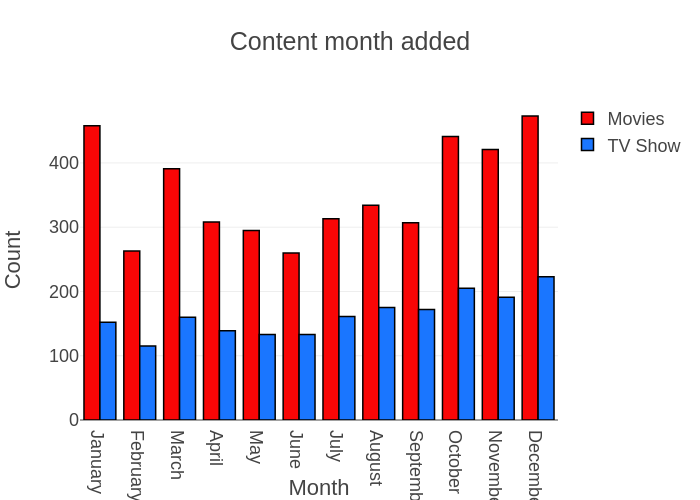

In [20]:
df_aux_movie_month_added = pd.DataFrame(netflix.loc[netflix['type']=='Movie'].month_added.value_counts())
df_aux_movie_month_added = df_aux_movie_month_added.reset_index()
df_aux_movie_month_added.columns = ['month','count']
df_aux_movie_month_added['num_month'] = df_aux_movie_month_added['month'].map(dictionary_month)
df_aux_movie_month_added.dropna(axis=0,inplace=True)
df_aux_movie_month_added.sort_values('num_month',inplace=True)

df_aux_tvshow_month_added = pd.DataFrame(netflix.loc[netflix['type']=='TV Show'].month_added.value_counts())
df_aux_tvshow_month_added = df_aux_tvshow_month_added.reset_index()
df_aux_tvshow_month_added.columns = ['month','count']
df_aux_tvshow_month_added['num_month'] = df_aux_tvshow_month_added['month'].map(dictionary_month)
df_aux_tvshow_month_added.dropna(axis=0,inplace=True)
df_aux_tvshow_month_added.sort_values('num_month',inplace=True)

trace_movie_month_added = go.Bar(
                    x=df_aux_movie_month_added['month'], 
                    y=df_aux_movie_month_added["count"], 
                    name="Movies", 
                    marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

trace_tvshow_month_added = go.Bar(
                    x=df_aux_tvshow_month_added['month'], 
                    y=df_aux_tvshow_month_added["count"], 
                    name="TV Show", 
                    marker= dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(hovermode= 'closest', title = 'Content month added' , xaxis = dict(title = 'Month'), yaxis = dict(title = 'Count'),template= "presentation")
fig = go.Figure(data = [trace_movie_month_added, trace_tvshow_month_added], layout=layout)
fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

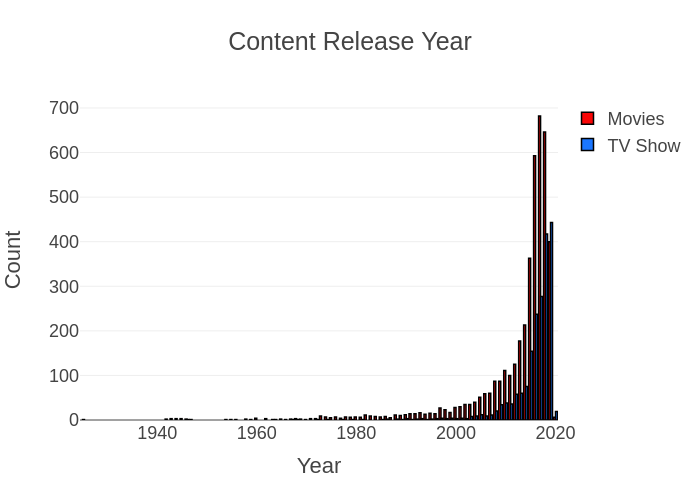

In [21]:
df_aux_movie_release = pd.DataFrame(netflix.loc[netflix['type']=='Movie'].release_year.value_counts())
df_aux_movie_release = df_aux_movie_release.reset_index()
df_aux_movie_release.columns = ['year','count']
df_aux_movie_release.sort_values('year',inplace=True)

df_aux_tvshow_release = pd.DataFrame(netflix.loc[netflix['type']=='TV Show'].release_year.value_counts())
df_aux_tvshow_release = df_aux_tvshow_release.reset_index()
df_aux_tvshow_release.columns = ['year','count']
df_aux_tvshow_release.sort_values('year',inplace=True)

trace_movie_release = go.Bar(
                    x=df_aux_movie_release['year'], 
                    y=df_aux_movie_release["count"], 
                    name="Movies", 
                    marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

trace_tvshow_release = go.Bar(
                    x=df_aux_tvshow_release['year'], 
                    y=df_aux_tvshow_release["count"], 
                    name="TV Show", 
                    marker= dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(hovermode= 'closest', title = 'Content Release Year' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'),template= "presentation")
fig = go.Figure(data = [trace_movie_release, trace_tvshow_release], layout=layout)
fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

# Please note that 2020 it's not over yet - so...less data avaliable

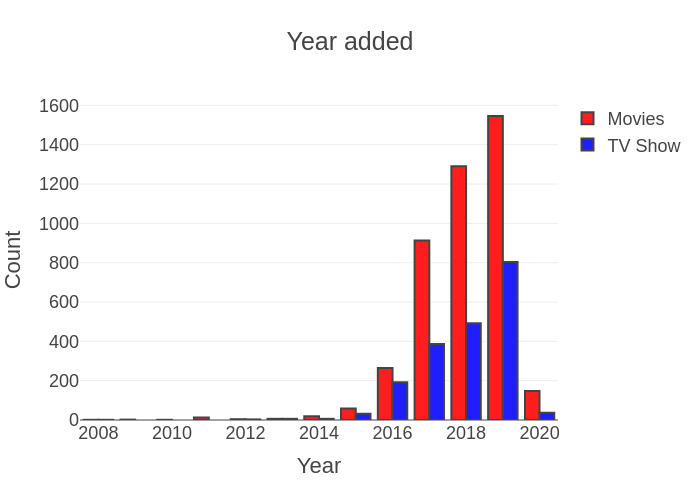

In [22]:
df_aux_movie_added = pd.DataFrame(netflix.loc[netflix['type']=='Movie'].year_added.value_counts())
df_aux_movie_added = df_aux_movie_added.reset_index()
df_aux_movie_added.columns = ['year','count']
df_aux_movie_added.sort_values('year',inplace=True)

df_aux_tvshow_added = pd.DataFrame(netflix.loc[netflix['type']=='TV Show'].year_added.value_counts())
df_aux_tvshow_added = df_aux_tvshow_added.reset_index()
df_aux_tvshow_added.columns = ['year','count']
df_aux_tvshow_added.sort_values('year',inplace=True)

trace_movie_added = go.Bar(
                    x=df_aux_movie_added['year'], 
                    y=df_aux_movie_added["count"], 
                    name="Movies", 
                    marker=dict(color = 'rgb(255, 30, 30)',
                             line=dict(width=2)))

trace_tvshow_added = go.Bar(
                    x=df_aux_tvshow_added['year'], 
                    y=df_aux_tvshow_added["count"], 
                    name="TV Show", 
                    marker= dict(color = 'rgb(30, 30, 255)', line=dict(width=2)))
layout = go.Layout(hovermode= 'closest', title = 'Year added' ,
                   xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'),
                   template= "presentation")

fig = go.Figure(data = [trace_movie_added, trace_tvshow_added], layout=layout)
fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

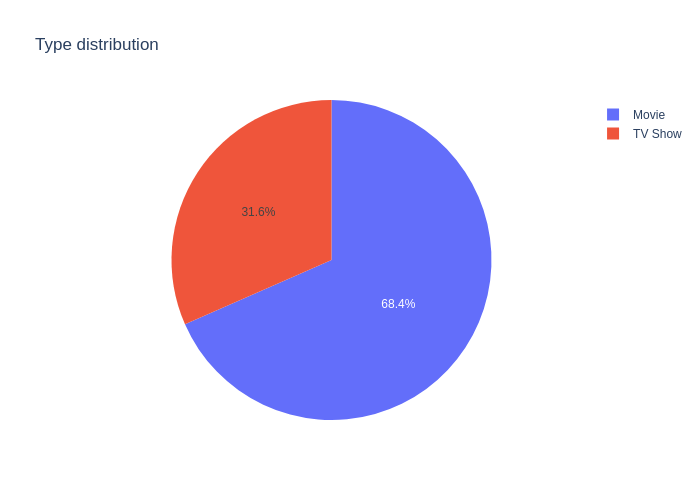

In [23]:
labels = list(netflix.type.value_counts().index)
values = list(netflix.type.value_counts().values)

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(
    title_text="Type distribution")
fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

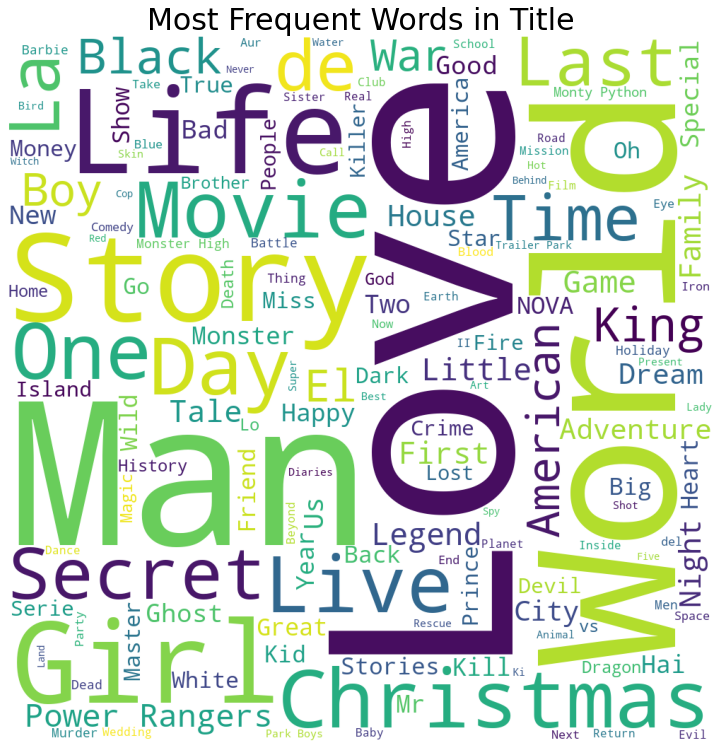

In [24]:
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'white', width = 1000,
                      height = 1000, max_words = 150).generate(' '.join(netflix['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in Title',fontsize = 30)
plt.show()

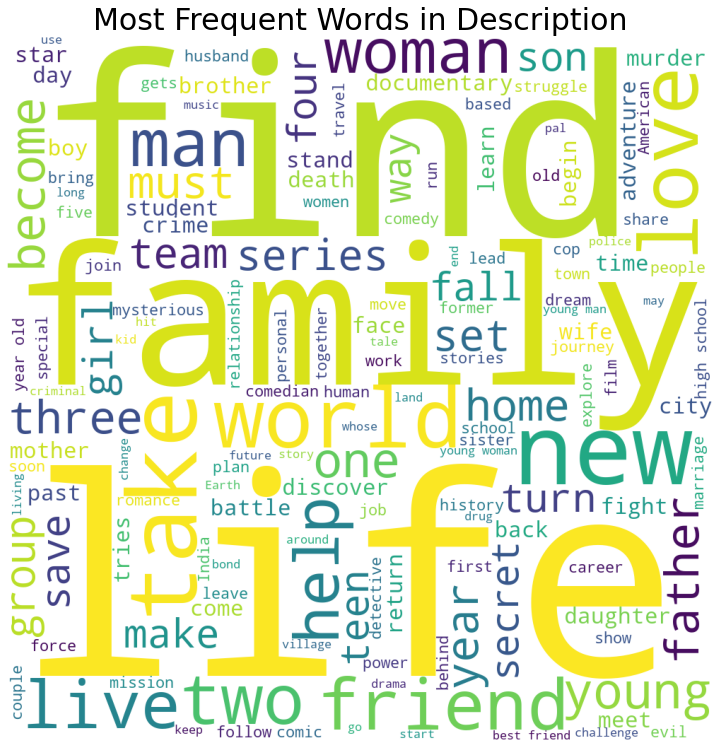

In [25]:
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'white',
                      width = 1000,  height = 1000, max_words = 150).generate(' '.join(netflix['description']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in Description',fontsize = 30)
plt.show()

In [26]:
netflix.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description month_added day_added  \
0  Before planning an awesome wedding for his gra...   September      None   
1  Jandino Asporaat riffs on the challenges of ra...   September      None   
2  With the help of three human allies, the Autob...   September      None   
3  When a prison ship crash unleashes hundreds of...   September      None   
4  When nerdy high schooler Dani finally attracts...   September      None   

  year_added  duration_min  seasons  
0       2019          90.0      NaN  
1       2016          94.0      NaN  
2       2018           NaN      1.0  
3       2018           NaN      1.0  
4       2017          99.0      NaN

In [27]:
netflix[netflix.duration_min.notnull()]['type'].value_counts()

Movie    4265
Name: type, dtype: int64

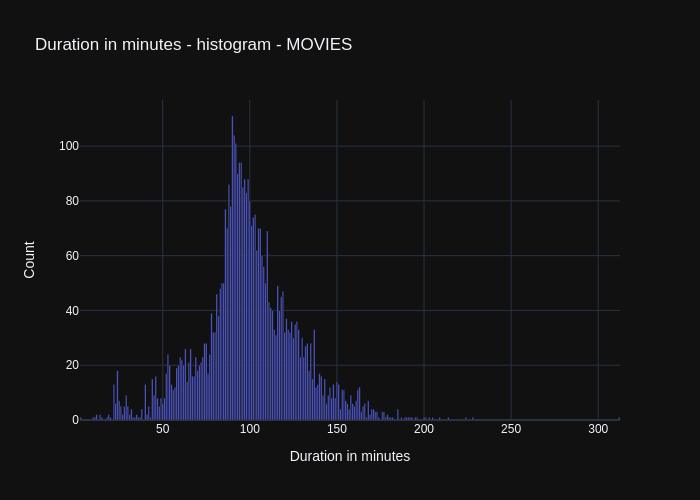

In [28]:
data = [
    go.Bar(
        x=netflix['duration_min'].value_counts().index,
        y=netflix['duration_min'].value_counts(),
        orientation='v',
        text="Duration in minutes, Occurrences ",
    )]


layout = go.Layout(
    height=500,
    title='Duration in minutes - histogram - MOVIES',
    hovermode='closest',
    xaxis=dict(title='Duration in minutes', ticklen=1, zeroline=True, gridwidth=1),
    yaxis=dict(title='Count', ticklen=1,zeroline=True, gridwidth=1),
    showlegend=False,template= "plotly_dark"
)

fig = go.Figure(data=data, layout=layout)
fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

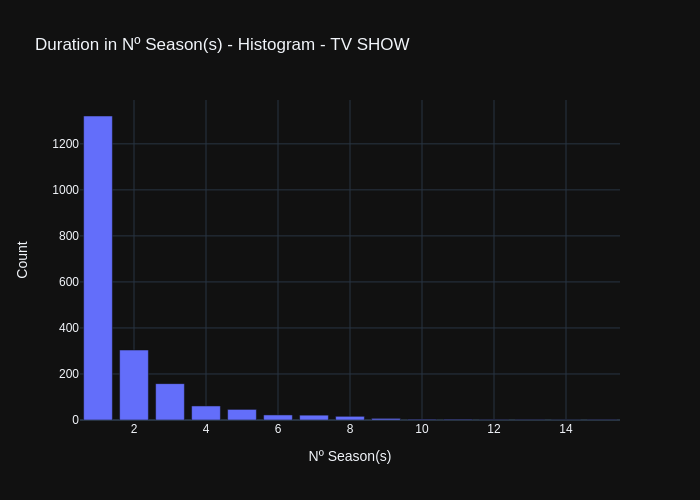

In [29]:
data = [
    go.Bar(
        x=netflix['seasons'].value_counts().index,
        y=netflix['seasons'].value_counts(),
        orientation='v',
        text="Nº Season(s), Occurrences ",
    )]


layout = go.Layout(
    height=500,
    title='Duration in Nº Season(s) - Histogram - TV SHOW',
    hovermode='closest',
    xaxis=dict(title='Nº Season(s)', ticklen=1, zeroline=True, gridwidth=1),
    yaxis=dict(title='Count', ticklen=1,zeroline=True, gridwidth=1),
    showlegend=False,template= "plotly_dark"
)

fig = go.Figure(data=data, layout=layout)
fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)

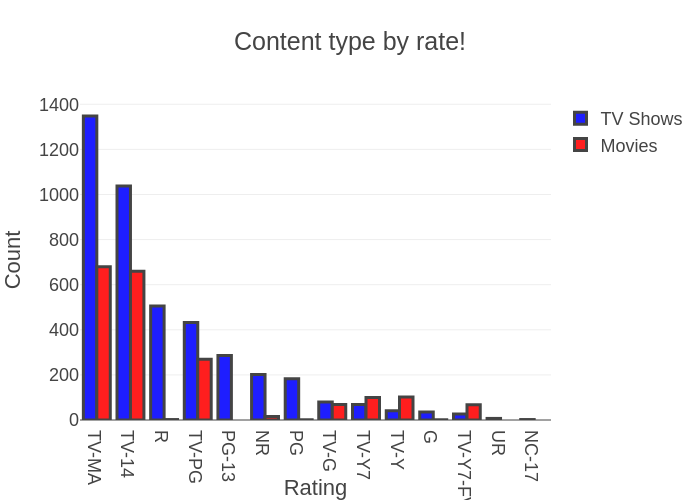

In [30]:
df_aux_movie_rating = pd.DataFrame(netflix.loc[netflix['type']=='Movie'].rating.value_counts()).reset_index()
df_aux_movie_rating.columns = ['rating','count']

df_aux_tvshow_rating = pd.DataFrame(netflix.loc[netflix['type']=='TV Show'].rating.value_counts()).reset_index()
df_aux_tvshow_rating.columns = ['rating','count']

# create trace1
trace1 = go.Bar(
                y = df_aux_movie_rating['count'],
                x = df_aux_movie_rating['rating'],
                name="TV Shows",
                marker = dict(color = 'rgb(30, 30, 255)',
                             line=dict(width=3)))
# create trace2 
trace2 = go.Bar(
                y = df_aux_tvshow_rating['count'],
                x = df_aux_tvshow_rating['rating'],
                name = "Movies",
                marker = dict(color = 'rgb(255, 30, 30)',
                              line=dict(width=3)))


layout = go.Layout(template= "presentation",title = 'Content type by rate!' ,
                   xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))

fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()
img_bytes = fig.to_image(format="png")
Image(img_bytes)